# Introduction

The purpose of this project is to predict satisfaction of airline customers. The data set contains survey results of previous customers about their flight experience. The goal of the project is to build a machine learning model using previous customer survey results to predict whether a future customer would be satisfied overall with their flight experience.

For this purpose Supervised Machine Learning Classification models are developed. Three models were developed and compared with each other, namely Logistic Regression, AdaBoost and Random Forest. Later Hyperparameter tuning on Random Forest Model is performed and the best model for the task is selected based on performance metrics such as accuracy, precision, recall and F1.  

## Data Source

Data Source Citation: 
Jana, S. (2020, March 19). Airlines customer satisfaction. Kaggle. https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction/data 

This data includes survey responses from 129880 customers about their satisfaction with the airlines after traveling with them. It includes data points such as seat comfort, type of travel, and in-flight entertainment, as well as demographic data.

The full list of the 23 columns and their range of values are as follows:
1. satisfaction: satisfied or dissatisfied
2. Gender: Male or Female
3. Customer type: loyal or disloyal customer
4. Age: age of the passenger
5. Type of travel: personal or business travel
6. Class: business, economy, economy plus
7. Flight distance
8. Seat comfort: 0-5
9. Departure/Arrival time convenient: 0-5
10. Food and drink: 0-5
11. Gate location: 0-5
12. Inflight wifi service: 0-5
13. Inflight entertainment: 0-5
14. Online Support: 0-5
15. Ease of Online booking: 0-5
16. On-board service: 0-5
17. Leg room service: 0-5
18. Baggage handling: 0-5
19. Checkin service: 0-5
20. Cleanliness: 0:-5
21. Online boarding: 0-5
22. Departure delay in minutes
23. Arrival delay in minutes

## Importing Libraries

In [397]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.inspection import PartialDependenceDisplay

from warnings import filterwarnings
filterwarnings(action='ignore')

## Exploratory Data Analysis
Let's start by loading in the data and checking data size. 

In [398]:
# load the data and check the shape
airline = pd.read_csv("Invistico_Airline.csv")
airline.shape

(129880, 23)

**Data Size:** The data has **129880** rows and **23** columns.

Let's check the first few rows:

In [399]:
airline.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


When we check the data types we can see that except for satisfaction, Gender, Customer Type, Type of Travel and Class all columns have integer or float data type:

In [400]:
airline.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

To get a better understading of our data, let's check the description. For example, can see that the mean age of customers is 39,4, mean Seat comfort rating is 2.8 and mean Cleanliness rating is 3.7.

In [401]:
airline.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Data Visualizations and Initial Analysis
Let's visualize the distributions of some features with respect to satisfaction to get an understanding of the data. 

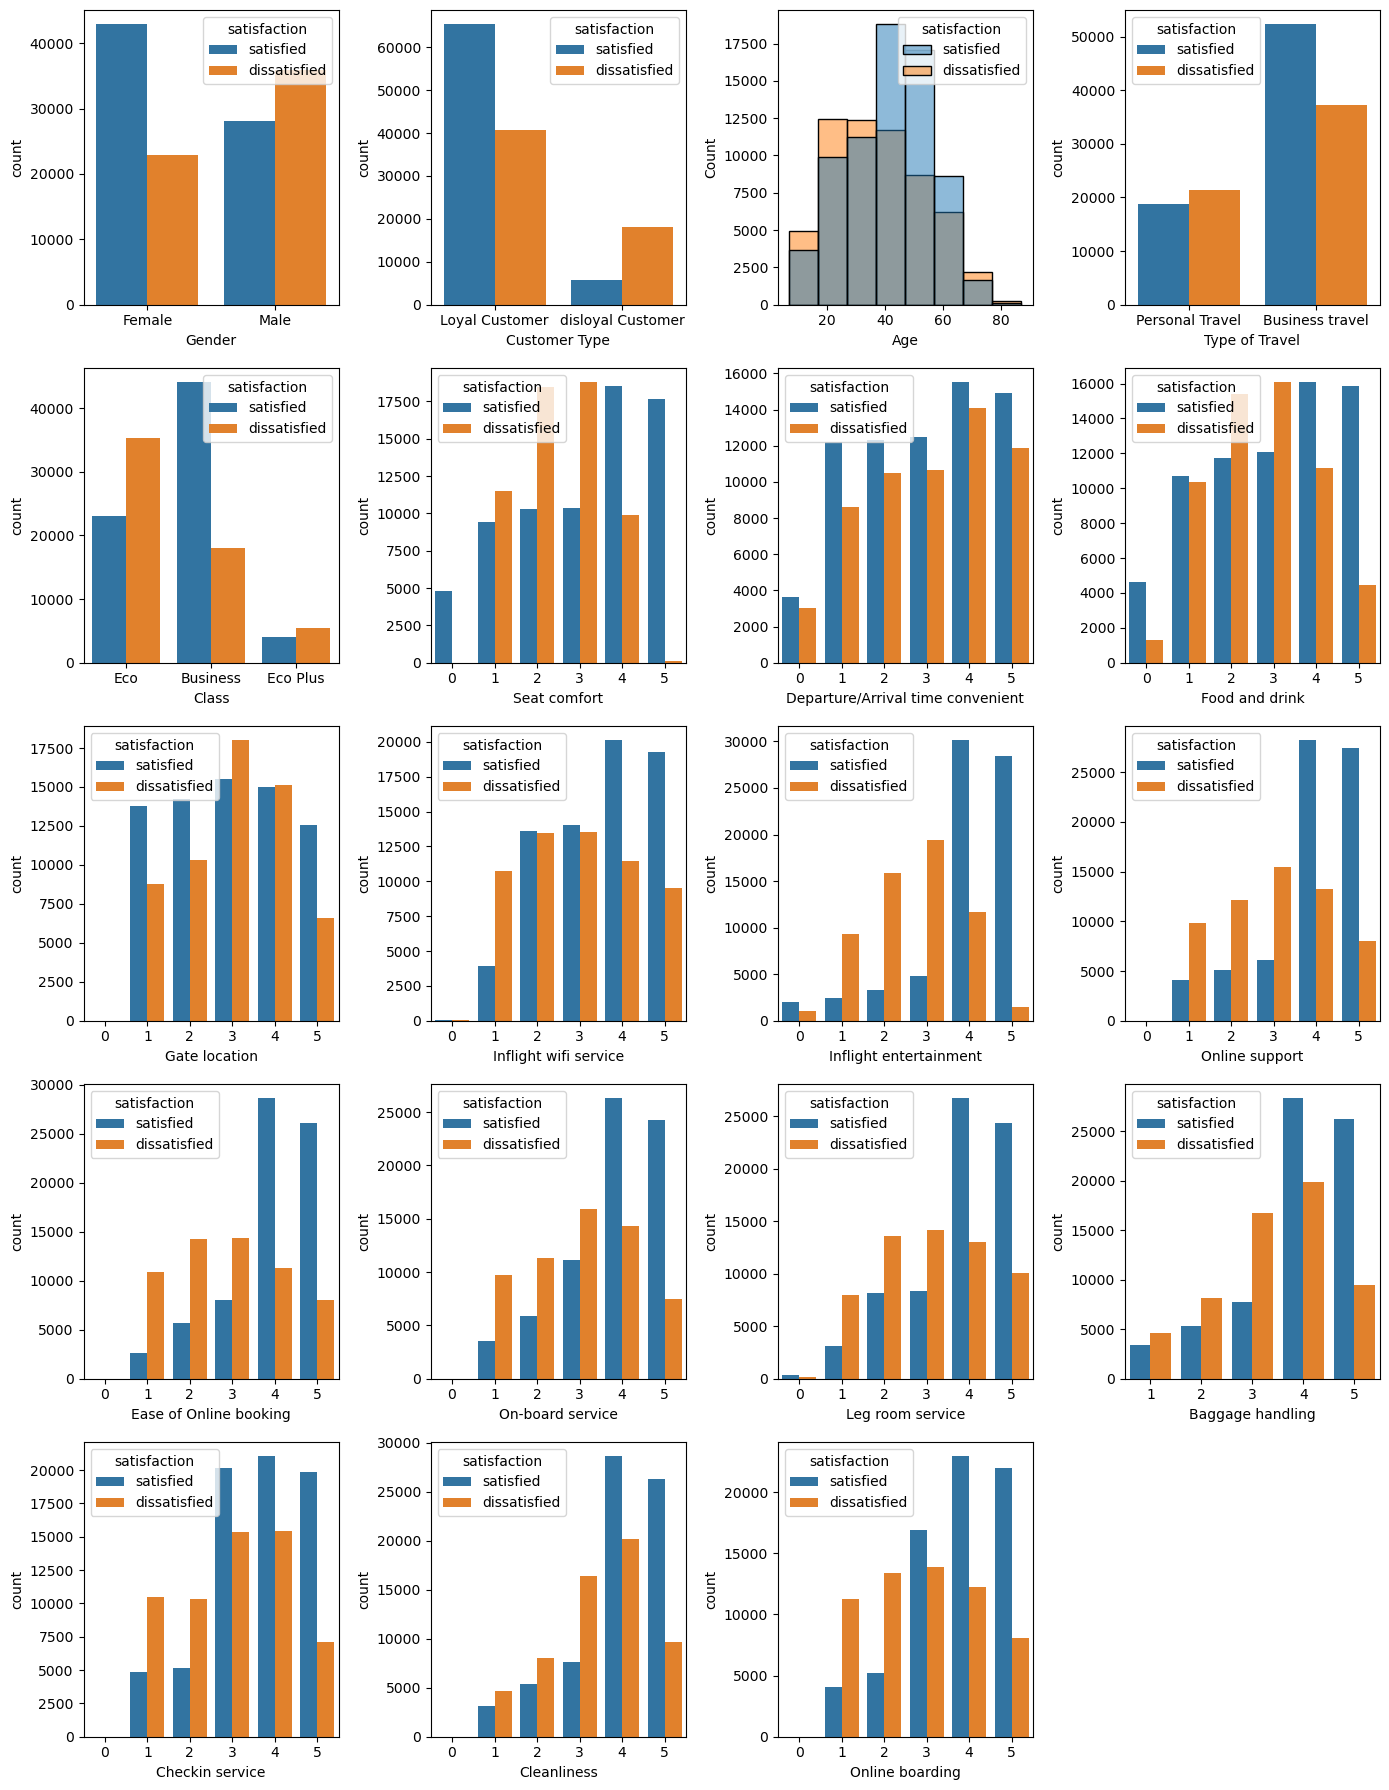

In [402]:
fig = plt.figure(figsize=(14,18))

fig.add_subplot(5,4,1)
sns.countplot(x = 'Gender', hue = 'satisfaction', data = airline) 
fig.add_subplot(5,4,2)
sns.countplot(x = 'Customer Type', hue = 'satisfaction', data = airline) 
fig.add_subplot(5,4,3)
sns.histplot(x = 'Age', hue = 'satisfaction', binwidth = 10, data = airline)
fig.add_subplot(5,4,4)
sns.countplot(x = 'Type of Travel', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,5)
sns.countplot(x = 'Class', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,6)
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,7)
sns.countplot(x = 'Departure/Arrival time convenient', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,8)
sns.countplot(x = 'Food and drink', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,9)
sns.countplot(x = 'Gate location', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,10)
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,11)
sns.countplot(x = 'Inflight entertainment', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,12)
sns.countplot(x = 'Online support', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,13)
sns.countplot(x = 'Ease of Online booking', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,14)
sns.countplot(x = 'On-board service', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,15)
sns.countplot(x = 'Leg room service', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,16)
sns.countplot(x = 'Baggage handling', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,17)
sns.countplot(x = 'Checkin service', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,18)
sns.countplot(x = 'Cleanliness', hue = 'satisfaction', data = airline)
fig.add_subplot(5,4,19)
sns.countplot(x = 'Online boarding', hue = 'satisfaction', data = airline)

plt.tight_layout()
plt.show()

There are several trends we can notice in the above plots:
* Female customers report a higher degree of satisfaction than male customers.
* Loyal customers are associated with higher degree of satisfaction, altough this is probably because satisfied customers tend to be loyal.
* Satisfaction seems higher in the middle age group 40-60.
* Better rating of food seem to be positively associated  satisfaction.
* Gate location does not seem to matter in terms of satisfaction.
* Better wi-fi service seems to be associated with satisfaction.
* Better rated inflight entertainment seems to be highly associated with satisfaction.
* Better rated on line support, Ease of Online booking, online boarding  seem to be associated with satisfaction
* Better rated on-board service, leg room service, baggage handling, checkin service and cleanliness also seem to be associated with satisfaction. 

## Data Cleaning

Checking for NA values:

In [403]:
# check for missing values
airline.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

There are 393 missing values in Arrival Delay in Minutes. Since this is a small percentage of the total amount of data (129880 vs. 393) we are going to to drop the rows with NA values.

In [404]:
airline = airline.dropna(axis=0)

Reconfirm that there are no more missing values:

In [405]:
airline.isna().any(axis=1).sum()

0

### one-hot encoding
Categorical features need to be converted to one-hot encoded features, because the models we are going to use (e.g. Random Forest) require categorical features to be encoded to numeric using dummy variables or one-hot encoding. Here we are converting Customer Type, Type of Travel and Class to dummy variables.

In [406]:
airline = pd.get_dummies(airline, columns=['Customer Type','Type of Travel','Class'])

When we check the first few rows to see the effect, we notice the dummies that were created such as Class_Business, Class_Eco and Class_EcoPlus instead of the single Class feature with Business, Eco and EcoPlus values. 

In [407]:
airline.head()

,satisfaction,Gender,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,Female,65,265,0,0,0,2,2,4,...,2,0,0.0,True,False,False,True,False,True,False
1,satisfied,Male,47,2464,0,0,0,3,0,2,...,2,310,305.0,True,False,False,True,True,False,False
2,satisfied,Female,15,2138,0,0,0,3,2,0,...,2,0,0.0,True,False,False,True,False,True,False
3,satisfied,Female,60,623,0,0,0,3,3,4,...,3,0,0.0,True,False,False,True,False,True,False
4,satisfied,Female,70,354,0,0,0,3,4,3,...,5,0,0.0,True,False,False,True,False,True,False


### Label Encoding
For the other categorical fetures in our data, we will use label encoding to convert to numerical value. satisfaction, Gender features will be converted to 0 or 1, as they have only 2 possible values, male or female, satisfied or dissatisfied. 

In [408]:
for i in airline.select_dtypes(include=['object']):
        lenc = LabelEncoder()
        airline[i] = lenc.fit_transform(airline[i])

In [409]:
airline.head()

,satisfaction,Gender,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,65,265,0,0,0,2,2,4,...,2,0,0.0,True,False,False,True,False,True,False
1,1,1,47,2464,0,0,0,3,0,2,...,2,310,305.0,True,False,False,True,True,False,False
2,1,0,15,2138,0,0,0,3,2,0,...,2,0,0.0,True,False,False,True,False,True,False
3,1,0,60,623,0,0,0,3,3,4,...,3,0,0.0,True,False,False,True,False,True,False
4,1,0,70,354,0,0,0,3,4,3,...,5,0,0.0,True,False,False,True,False,True,False


### Correlation Matrix Heat Map
To check correlation between the features, we will use a heat map. Lighter colors indicate higher correlation. 

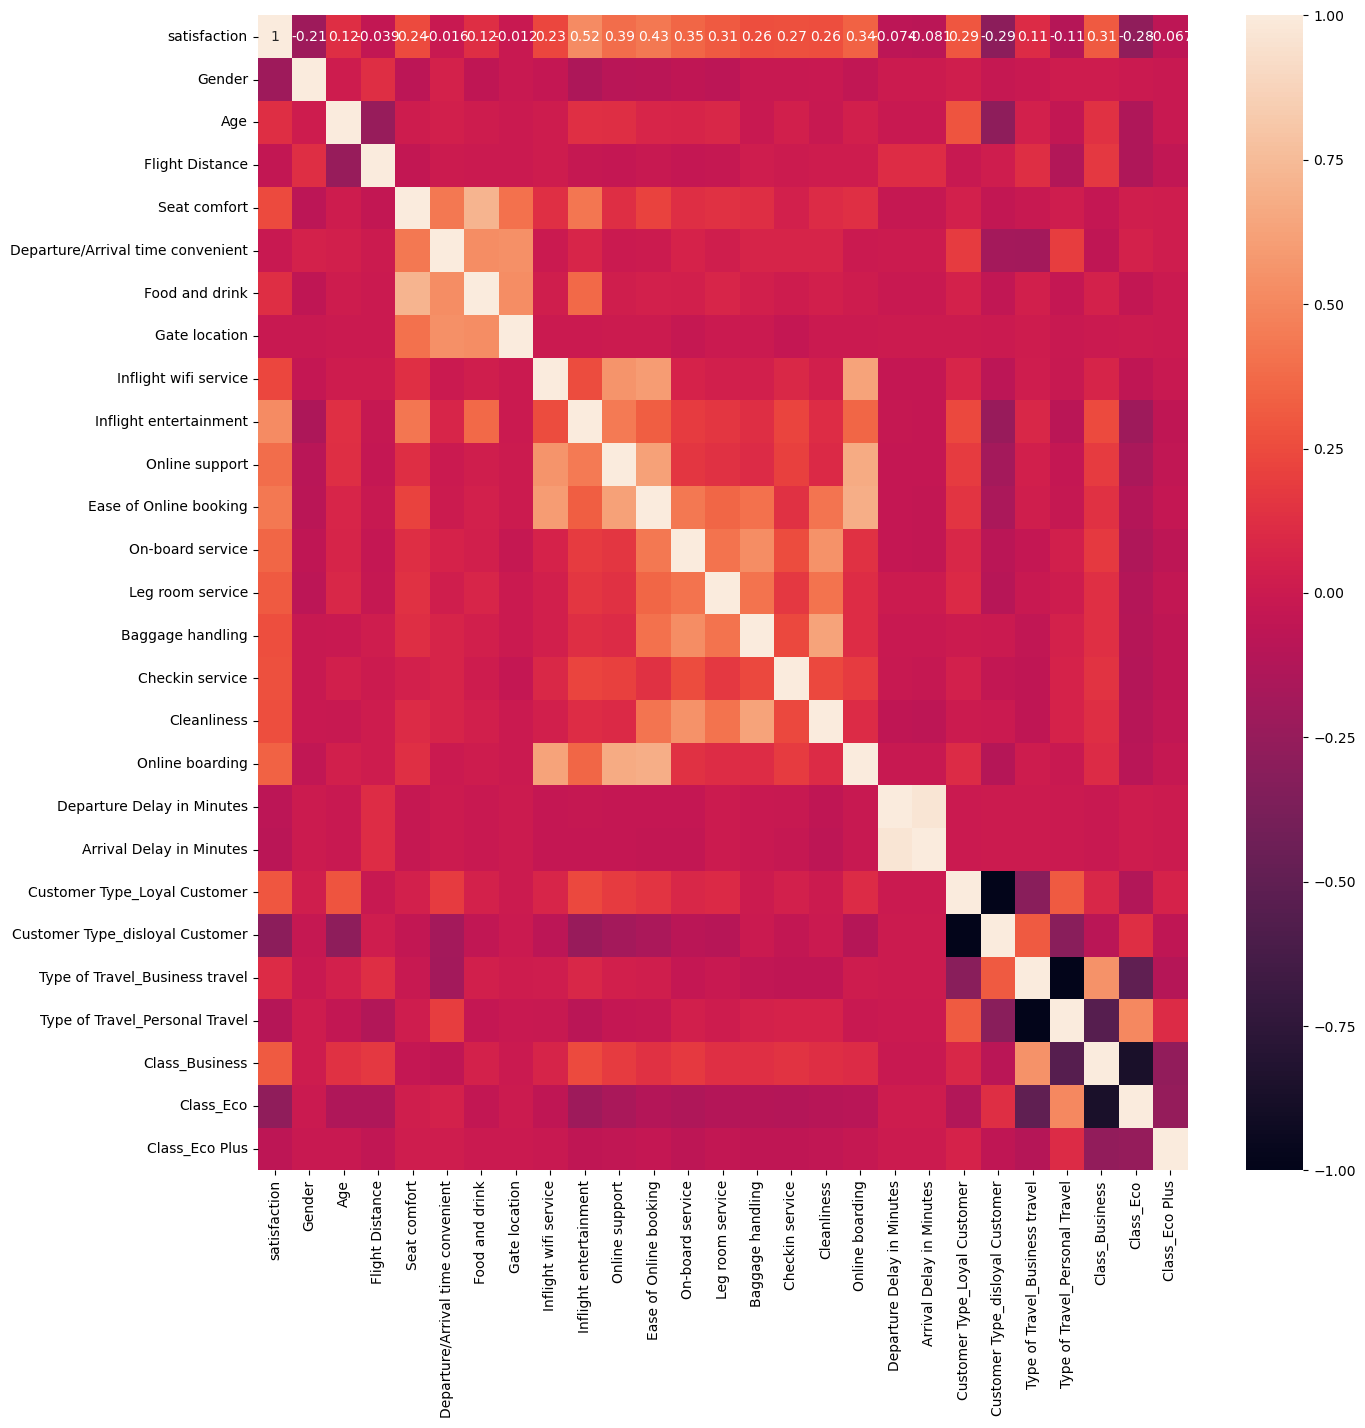

In [410]:
plt.figure(figsize=(15, 15))
sns.heatmap(airline.corr(), annot=True)
plt.savefig('corheat.png', dpi=300)

In flight entertainment, On line boarding seem to be highly correlated with satisfaction. 

Departure Delay in Minutes and Arrival Delay in Minutes are very highly correlated. Although collinearity is not much of an issue for Random Forest and AdaBoost, we can drop the Arrival Delay in Minutes feature to prevent collinearity in Logistic Regression. Also for Random Forest and AdaBoost, this will help with the interpretability of the results. 

In [411]:
airline = airline.drop("Arrival Delay in Minutes", axis = 1)

In [412]:
airline.head()

,satisfaction,Gender,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Cleanliness,Online boarding,Departure Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,65,265,0,0,0,2,2,4,...,3,2,0,True,False,False,True,False,True,False
1,1,1,47,2464,0,0,0,3,0,2,...,3,2,310,True,False,False,True,True,False,False
2,1,0,15,2138,0,0,0,3,2,0,...,4,2,0,True,False,False,True,False,True,False
3,1,0,60,623,0,0,0,3,3,4,...,1,3,0,True,False,False,True,False,True,False
4,1,0,70,354,0,0,0,3,4,3,...,2,5,0,True,False,False,True,False,True,False


#### Data Cleaning Summary Findings
* We found that there were 393 NA values and dropped those rows from our data as this is a small fraction of our data. 
* We converted Customer Type, Type of Travel and Class to dummy variables so that they are numeric values to be able to use in our models.
* We converted satisfaction and Gender features to numeric values using Label Encoding, again to be able to use in our models.
* In the correlation matrix heat map we noticed high correlation between Departure Delay in Minutes and Arrival Delay in Minutes and we dropped Arrival Delay in Minutes feature to prevent **collinearity** in our Logistic Regression model and help interpretability for Random Forest and AdaBoost results.

## Modeling
First we will prepare our data for modeling. Our target feature is "satisfaction", which will become our y. X is the rest of the features. 

In [413]:
X = airline.drop("satisfaction", axis=1)
y = airline["satisfaction"]

Next we will separate our data into training and testing sets. 

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12)

We will try three models:
* Logistic Regression
* Ada Boost
* Random Forest

### Logistic Regression Model
We will fit a Logistic Regression Model on our data and predict with our test set. Then we will compare our predicted values with actual values and calculate accuracy, precision, recall and F1 scores.

Accuracy =  0.7973974824310758
Precision =  0.7913197403789418
Recall =  0.8539691523984718
F1 =  0.8214516622996563


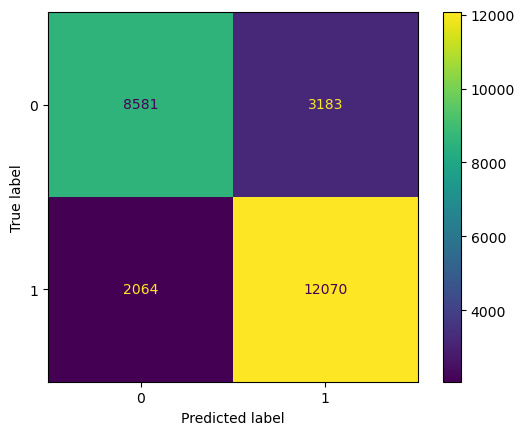

In [415]:
# Logistic Regression Model
logrm = LogisticRegression()
logrm.fit(X_train,y_train)

# predict with X_test
y_pred = logrm.predict(X_test)

# scores
lgrm_accuracy = accuracy_score(y_test, y_pred)
lgrm_precision = precision_score(y_test, y_pred)
lgrm_recall = recall_score(y_test, y_pred)
lgrm_f1 = f1_score(y_test, y_pred)

print("Accuracy = ", lgrm_accuracy)
print("Precision = ", lgrm_precision)
print("Recall = ", lgrm_recall)
print("F1 = ", lgrm_f1)

# store results for future comparison
results = pd.DataFrame({'model': 'Logistic Regression', 'accuracy': lgrm_accuracy, 
                        'precision': lgrm_precision, 'recall': lgrm_recall, 'F1': lgrm_f1}, index = [0])

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logrm.classes_)
disp.plot()


Our Logistic Regression Model predicted 12070 satisfied and 8581 dissatisfied customers in our test data correctly, however classified 2064 satisfied customers as dissatisfied and 3183 dissatisfied customers as satisfied. Accuracy score is 0.80, Precision score is 0.80, Recall score is 0.85 and F1 score is 0.82.

### Ada Boost Model
Next, we will fit a Ada Boost Model on our data and predict with our test set. Then we will compare our predicted values with actual values and calculate accuracy, precision, recall and F1 scores.

Accuracy =  0.8997219862537648
Precision =  0.9085050633807804
Recall =  0.9076694495542663
F1 =  0.9080870642364185


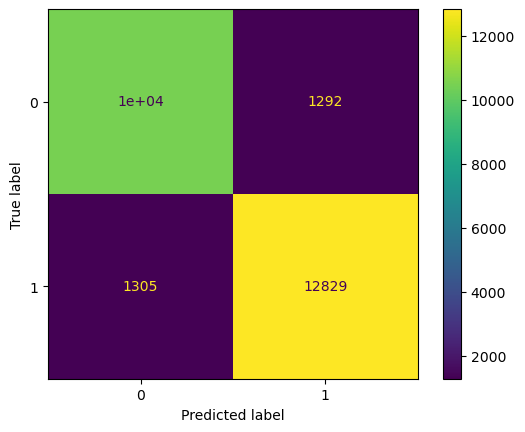

In [416]:
adam = AdaBoostClassifier()
adam.fit(X_train,y_train)

y_pred = adam.predict(X_test)
adam_accuracy = accuracy_score(y_test, y_pred)
adam_precision = precision_score(y_test, y_pred)
adam_recall = recall_score(y_test, y_pred)
adam_f1 = f1_score(y_test, y_pred)

print("Accuracy = ", adam_accuracy)
print("Precision = ", adam_precision)
print("Recall = ", adam_recall)
print("F1 = ", adam_f1)

# adding scores to results for comparison
res = {'model': 'Ada Boost', 'accuracy': adam_accuracy, 'precision': adam_precision,
       'recall': adam_recall, 'F1': adam_f1}
results.loc[len(results)] = res

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logrm.classes_)
disp.plot()


Our AdaBoost Model predicted 12829 satisfied and 10000 dissatisfied customers in our test data correctly, however classified 1305 satisfied customers as dissatisfied and 1292 dissatisfied customers as satisfied. Accuracy score is 0.90, Precision score is 0.91, Recall score is 0.91 and F1 score is 0.91. Our AdaBoost model performed much better than Logistic Regression Model.

### Random Forest Model
Now we will fit a Random Forest Model on our data and predict with our test set. Then we will compare our predicted values with actual values and calculate accuracy, precision, recall and F1 scores.

Accuracy =  0.958606842227199
Precision =  0.9682391740751363
Recall =  0.9554973821989529
F1 =  0.9618260807634784


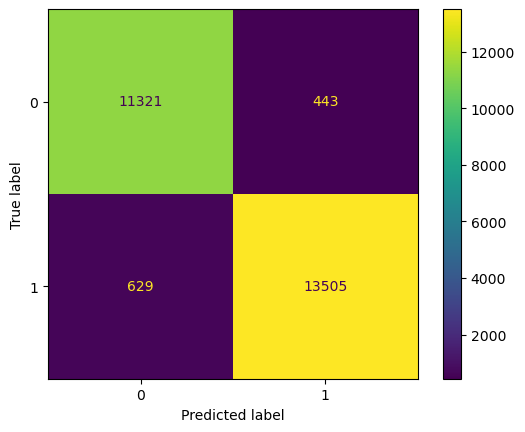

In [417]:
rfcm = RandomForestClassifier(random_state = 12)
rfcm.fit(X_train,y_train)

y_pred = rfcm.predict(X_test)

# scores
rfcm_accuracy = accuracy_score(y_test, y_pred)
rfcm_precision = precision_score(y_test, y_pred)
rfcm_recall = recall_score(y_test, y_pred)
rfcm_f1 = f1_score(y_test, y_pred)

print("Accuracy = ", rfcm_accuracy)
print("Precision = ", rfcm_precision)
print("Recall = ", rfcm_recall)
print("F1 = ", rfcm_f1)

# store scores for future comparison
res = {'model': 'Random Forest', 'accuracy': rfcm_accuracy, 'precision': rfcm_precision,
       'recall': rfcm_recall, 'F1': rfcm_f1}
results.loc[len(results)] = res

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logrm.classes_)
disp.plot()

Our Random Forest Model predicted 13505 satisfied and 11321 dissatisfied customers in our test data correctly, however classified 629 satisfied customers as dissatisfied and 443 dissatisfied customers as satisfied. Accuracy score is 0.96, Precision score is 0.97, Recall score is 0.96 and F1 score is 0.96. Our Random Forest model performed much better than both the AdaBoost and Logistic Regression Models.

### Hyperparameter Optimization for Random Forest Model
Random Forest Model is the winner in our model search. Now, we will try hyperparameter optimization for Random Forest to see if we can improve the performance even more. 

In [418]:
# hyperparameter dictionary
param_grid = {'n_estimators' : [100, 200],
              'max_depth' : range(10,20),       
              'max_features' : ["sqrt", "log2"]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

We will try GridSearchCV to decide on the best parameters to use for Random Forest and print out the best estimator.

In [419]:
# perform the grid search with our param_grid dictionary
# takes a while to run
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid, n_jobs = -1, verbose = 1, 
                           scoring = scoring, refit = "f1") 

# fit on our training data
grid_search.fit(X_train, y_train) 

print(grid_search.best_estimator_) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
RandomForestClassifier(max_depth=19, n_estimators=200)


Now we will use the optimal paramaters found with GridSearchCV, namely max_depth = 19 and n_estimators = 200

In [420]:
# refitting the model with parameter found with GridSearchCV
rf = RandomForestClassifier(max_depth = 19, n_estimators = 200, random_state = 12)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, n_estimators=200, random_state=12)

Let's predict with our newly fitted model using our test data.

In [421]:
y_pred = rf.predict(X_test)

Accuracy =  0.9583751641053363
Precision =  0.9682926829268292
Recall =  0.9550021225413896
F1 =  0.961601481798105


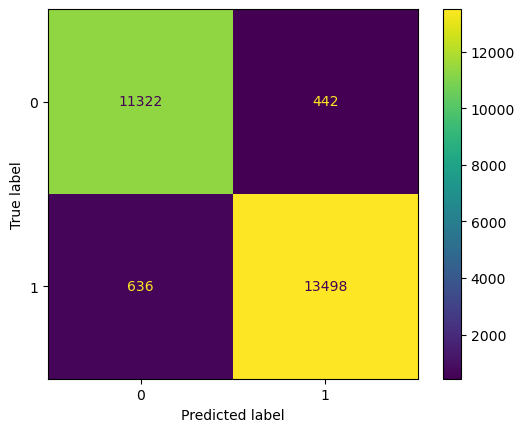

In [422]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print("Accuracy = ", rf_accuracy)
print("Precision = ", rf_precision)
print("Recall = ", rf_recall)
print("F1 = ", rf_f1)

res = {'model': 'Optimized Random Forest', 'accuracy': rf_accuracy, 'precision': rf_precision,
       'recall': rf_recall, 'F1': rf_f1}
results.loc[len(results)] = res

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logrm.classes_)
disp.plot()

Our new Random Forest Model predicted 13498 satisfied and 11322 dissatisfied customers in our test data correctly, however classified 636 satisfied customers as dissatisfied and 442 dissatisfied customers as satisfied. Accuracy score is 0.96, Precision score is 0.97, Recall score is 0.96 and F1 score is 0.96. These values are essentially the same with the old values where we used default Random Forest, which goes to show sometimes using the default is the best and it is always good to double check.

## Results and Analysis
Here we are going to start by comparing all of our models' performance scores. 

In [423]:
print(results)

                     model  accuracy  precision    recall        F1
0      Logistic Regression  0.797397   0.791320  0.853969  0.821452
1                Ada Boost  0.899722   0.908505  0.907669  0.908087
2            Random Forest  0.958607   0.968239  0.955497  0.961826
3  Optimized Random Forest  0.958375   0.968293  0.955002  0.961601


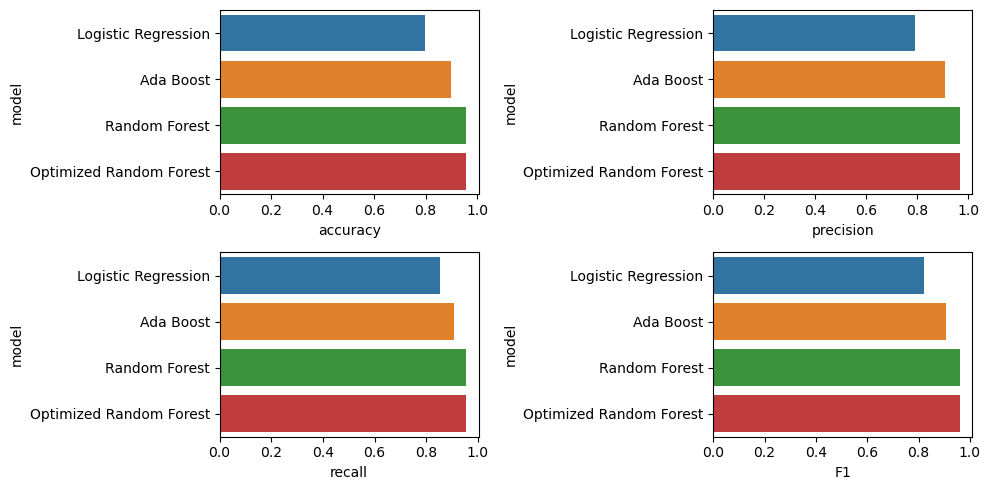

In [424]:
fig = plt.figure(figsize=(10, 5))
fig.add_subplot(2,2,1)
sns.barplot(data=results, x="accuracy", y="model")
fig.add_subplot(2,2,2)
sns.barplot(data=results, x="precision", y="model")
fig.add_subplot(2,2,3)
sns.barplot(data=results, x="recall", y="model")
fig.add_subplot(2,2,4)
sns.barplot(data=results, x="F1", y="model")

plt.tight_layout()
plt.show()

As we can see in the above plots and table, Random Forest model has the best accuracy, precision, recall and F1 scores. The optimized Random Forest model, where we used hyperparameter tuning did perform as good as the regular Random Forest Model, but not better.

Next, let's check feature importances of our Optimized Random Forest model.

<Axes: >

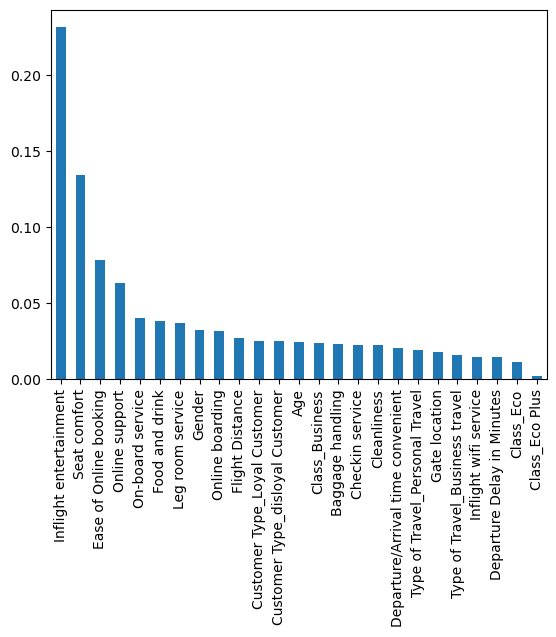

In [425]:
# combine feature importances from the model and feature names from X_train 
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# bar chart of feature importances
feature_importances.plot.bar()

As we can see on the feature importance plot inflight entertainment is by far the most important feature according to our model. We could suggest to the airline to invest in inflight entertainment to improve future customer satisfaction. Also Seat comfort and Ease of Online booking are important features for customer satisfaction.

## Discussion and Conclusion
For predicting future customer satisfaction Random Forest Model showed best performance among Logistic Regression and AdaBoost models.  
However employing hyperparameter optimization did not improve performance, which goes to show that sometimes the default parameters might be the best. As a best practice it might be a good idea to compare with the default parameters when performing hyperparameter tuning. It is also possible to come up with better hyperparameter values to test with experience. For future improvement different hyperparameter tuning methods such as RandomizedSearchCV can be tried out. However the performance of the Random Forest Model was already very good (0.96 F1 score) and it serves the task of predicting customer satisfaction well.  



github: https://github.com/DenizDemi/Supervised-Learning.git